In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Car details v3.csv')

# Understand the data

In [4]:
df.shape

(8128, 13)

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

# Cleaning the data

In [10]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
#df = df.drop(['mileage', 'engine'], axis = 1)

# relationship analysis

In [11]:
correlation = df.corr()

In [14]:
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

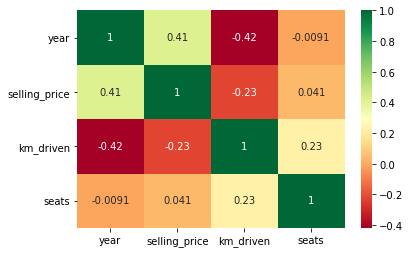

In [15]:
g=sns.heatmap(df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

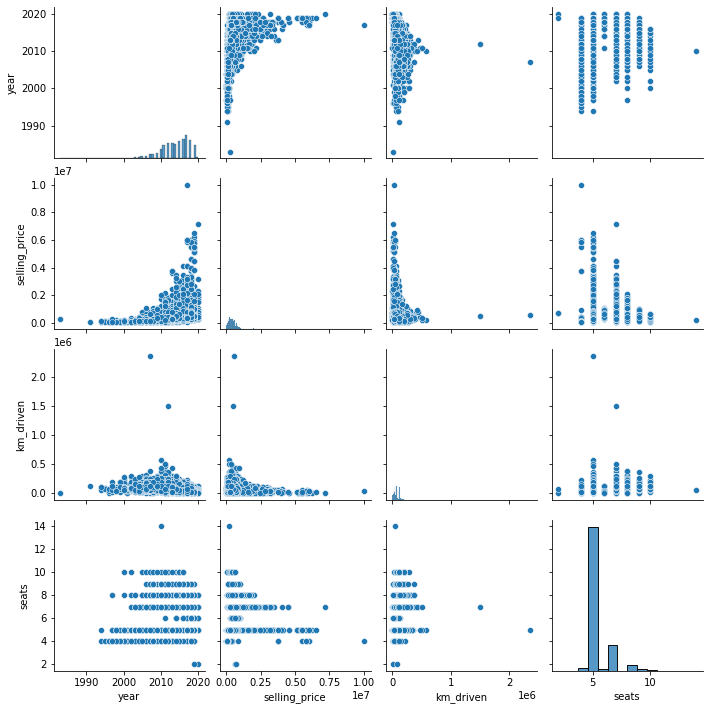

In [16]:
sns.pairplot(df)

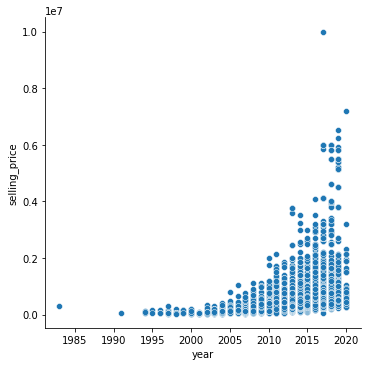

In [17]:
sns.relplot(x='year', y='selling_price', data=df)

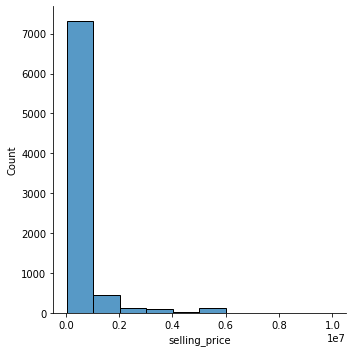

In [20]:
sns.displot(df['selling_price'], bins=10)

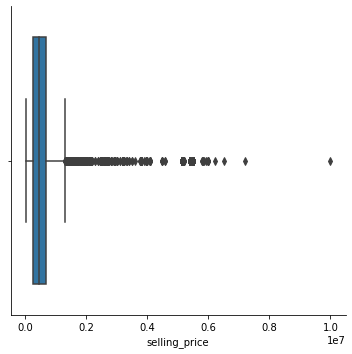

In [22]:
sns.catplot(x='selling_price', kind='box', data=df)

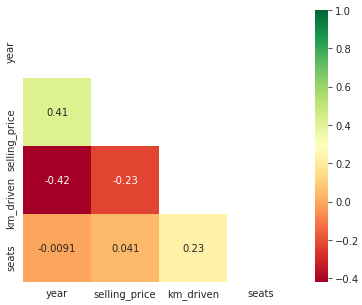

In [38]:
#Mask half of heat map
top_corr_features=corrmat.index
top_corr = df[top_corr_features].corr()
mask=np.zeros_like(top_corr)
mask[np.triu_indices_from(mask)]= True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(top_corr, mask=mask, vmax=1, square=True, annot=True, cmap="RdYlGn")